In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# 设置 Seaborn 主题
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

#subpath = "/home/zzpeng/CycleCA/Learning/PredictResult/1212&天数上限10&测试为下一天&sample_n100&is_search_True"
subpath = "/home/zzpeng/CycleCA/Learning/PredictResult/1217&天数上限10&测试为下一天&sample_n100&is_search_False"
# 定义参数范围
pro_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
didiNum_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
date_list = list(range(1, 60))  # 日期从1到59

# 获取 Autonavi 数据文件
autonavi_file_pattern = os.path.join(subpath, "Autonavi_predictions_n100_Pro*_date*.csv")
autonavi_file_list = glob.glob(autonavi_file_pattern)

# 获取 DiDi 数据文件
didi_file_pattern = os.path.join(subpath, "DiDi_predictions_n100_num_DiDi*_date*.csv")
didi_file_list = glob.glob(didi_file_pattern)

In [2]:
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    non_zero = actual != 0
    if not np.any(non_zero):
        return np.nan
    mape = np.mean(np.abs((actual[non_zero] - predicted[non_zero]) / actual[non_zero])) * 100
    return mape
def calculate_absolute_error(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    abs_error = np.abs(actual - predicted)
    return abs_error
def calculate_absolute_percentage_error(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    non_zero = actual != 0
    if not np.any(non_zero):
        return np.nan
    ape = np.abs((actual[non_zero] - predicted[non_zero]) / actual[non_zero]) * 100
    return ape

## Pro_Num -- MAPE

/tmp/ipykernel_65616/1188597558.py:99: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipykernel_65616/1188597558.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_65616/1188597558.py:119: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipykernel_65616/1188597558.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic 

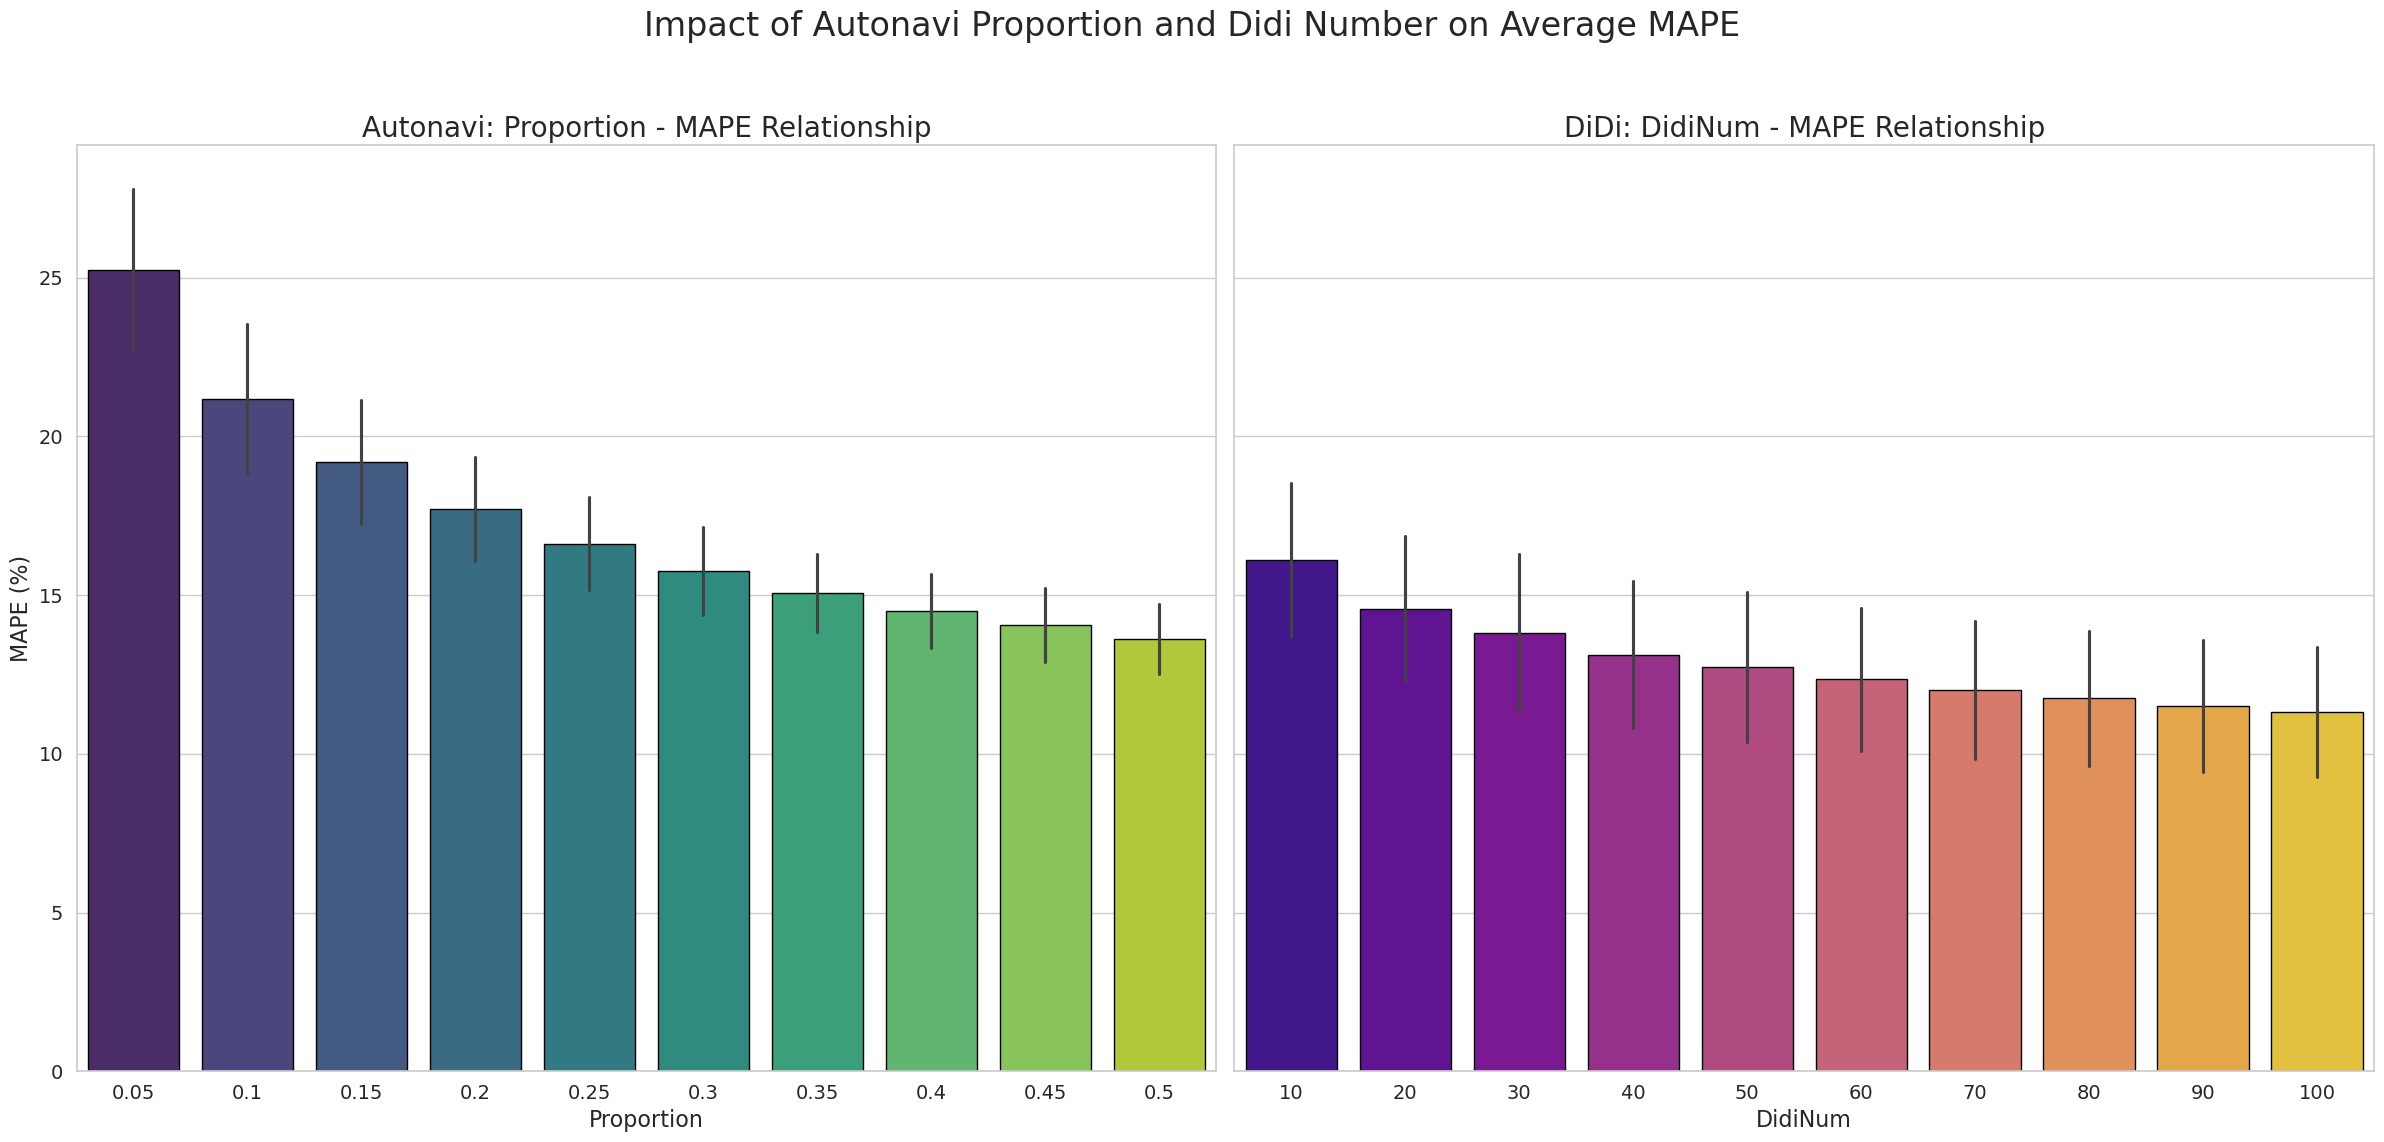

In [9]:
# 初始化列表存储 Autonavi 结果
list_autonavi_pro = []
list_autonavi_mape = []

# 初始化列表存储 DiDi 结果
list_didi_num = []
list_didi_mape = []

# 处理 Autonavi 数据文件
for file in autonavi_file_list:
    filename = os.path.basename(file)
    try:
        # 预期文件名格式: Autonavi_predictions_n100_Pro{pro}_date{m}.csv
        parts = filename.replace('.csv', '').split('_')
        pro_str = parts[3]  # 'Pro{pro}'
        date_str = parts[4]  # 'date{m}'

        pro = float(pro_str.replace('Pro', ''))
        m = int(date_str.replace('date', ''))

        if pro not in pro_list or m not in date_list:
            continue

        # 读取文件
        df = pd.read_csv(
            file,
            usecols=['Travel Time', 'Predicted Travel Time'],
            dtype={'Travel Time': int, 'Predicted Travel Time': float}
        )
        df['Predicted Travel Time'] = round(np.exp(df['Predicted Travel Time'])-1)
        # 计算 MAPE
        mape = calculate_mape(df['Travel Time'], df['Predicted Travel Time'])

        # 添加到列表
        list_autonavi_pro.append(pro)
        list_autonavi_mape.append(mape)

    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue



# 处理 DiDi 数据文件
for file in didi_file_list:
    filename = os.path.basename(file)
    try:
        # 预期文件名格式: DiDi_predictions_n100_num_DiDi{didiNum}_date{m}.csv
        parts = filename.replace('.csv', '').split('_')
        didi_str = parts[4]  # 'DiDi{didiNum}'
        date_str = parts[5]  # 'date{m}'

        didiNum = int(didi_str.replace('DiDi', ''))
        m = int(date_str.replace('date', ''))

        if didiNum not in didiNum_list or m not in date_list:
            continue

        # 读取文件
        df = pd.read_csv(
            file,
            usecols=['Travel Time', 'Predicted Travel Time'],
            dtype={'Travel Time': int, 'Predicted Travel Time': float}
        )
        df['Predicted Travel Time'] = round(np.exp(df['Predicted Travel Time'])-1)
        # 计算 MAPE
        mape = calculate_mape(df['Travel Time'], df['Predicted Travel Time'])

        # 添加到列表
        list_didi_num.append(didiNum)
        list_didi_mape.append(mape)

    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue

# 创建 DataFrames
results_autonavi = pd.DataFrame({
    'Pro': list_autonavi_pro,
    'MAPE': list_autonavi_mape
})

results_didi = pd.DataFrame({
    'DidiNum': list_didi_num,
    'MAPE': list_didi_mape
})

# 确保数据类型正确
results_autonavi['Pro'] = results_autonavi['Pro'].astype(float)
results_didi['DidiNum'] = results_didi['DidiNum'].astype(int)
results_autonavi['MAPE'] = results_autonavi['MAPE'].astype(float)
results_didi['MAPE'] = results_didi['MAPE'].astype(float)

# 绘制条形图，Seaborn 处理统计量
fig, axes = plt.subplots(1, 2, figsize=(24, 12), sharey=True)

# 绘制 Autonavi: Pro vs MAPE
if not results_autonavi.empty:
    sns.barplot(
        x='Pro',
        y='MAPE',
        data=results_autonavi,
        ci='sd',  # 使用标准差作为误差条
        ax=axes[0],
        palette='viridis',
        edgecolor='black'
    )
    axes[0].set_title('Autonavi: Proportion - MAPE Relationship', fontsize=20)
    axes[0].set_xlabel('Proportion', fontsize=16)
    axes[0].set_ylabel('MAPE (%)', fontsize=16)
    axes[0].tick_params(axis='both', which='major', labelsize=14)
else:
    axes[0].set_title('Autonavi Data is Empty', fontsize=20)
    axes[0].set_xlabel('Proportion (Pro)', fontsize=16)
    axes[0].set_ylabel('MAPE (%)', fontsize=16)

# 绘制 DiDi: DidiNum vs MAPE
if not results_didi.empty:
    sns.barplot(
        x='DidiNum',
        y='MAPE',
        data=results_didi,
        ci='sd',  # 使用标准差作为误差条
        ax=axes[1],
        palette='plasma',
        edgecolor='black'
    )
    axes[1].set_title('DiDi: DidiNum - MAPE Relationship', fontsize=20)
    axes[1].set_xlabel('DidiNum', fontsize=16)
    axes[1].tick_params(axis='both', which='major', labelsize=14)
else:
    axes[1].set_title('DiDi Data is Empty', fontsize=20)
    axes[1].set_xlabel('Didi Number (DidiNum)', fontsize=16)


# 添加主标题
plt.suptitle('Impact of Autonavi Proportion and Didi Number on Average MAPE', fontsize=24)

# 调整布局以适应主标题
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 可选：保存图形
# plt.savefig('Pro_DidiNum_MAPE_Comparison_Barplot.png', dpi=300)

# 显示图形
plt.show()

## PathLength -- MAPE

In [26]:
n = 200

# 初始化列表存储 Autonavi 结果
list_autonavi_pro = []
list_autonavi_path = []
list_autonavi_mape = []
list_autonavi_abs_error = []

# 初始化列表存储 DiDi 结果
list_didi_num = []
list_didi_path = []
list_didi_mape = []
list_didi_abs_error = []

for file in autonavi_file_list:
    filename = os.path.basename(file)
    try:
        parts = filename.replace('.csv', '').split('_')
        pro_str = parts[3]
        date_str = parts[4]
        pro = float(pro_str.replace('Pro', ''))
        m = int(date_str.replace('date', ''))

        if pro not in pro_list or m not in date_list:
            continue

        df = pd.read_csv(
            file,
            usecols=['PathLength', 'Travel Time', 'Predicted Travel Time'],
            dtype={'PathLength': int, 'Travel Time': int, 'Predicted Travel Time': float}
        )
        df['Predicted Travel Time'] = round(np.exp(df['Predicted Travel Time'])-1)

        if df.empty:
            continue

        abs_error = calculate_absolute_error(df['Travel Time'], df['Predicted Travel Time'])
        ape = calculate_absolute_percentage_error(df['Travel Time'], df['Predicted Travel Time'])

        list_autonavi_pro.extend([pro] * len(df))
        list_autonavi_mape.extend(ape)
        list_autonavi_abs_error.extend(abs_error)
        list_autonavi_path.extend(df['PathLength'].tolist())

    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue

for file in didi_file_list:
    filename = os.path.basename(file)
    try:
        parts = filename.replace('.csv', '').split('_')
        didi_str = parts[4]
        date_str = parts[5]
        didiNum = int(didi_str.replace('DiDi', ''))
        m = int(date_str.replace('date', ''))

        if didiNum not in didiNum_list or m not in date_list:
            continue

        df = pd.read_csv(
            file,
            usecols=['PathLength', 'Travel Time', 'Predicted Travel Time'],
            dtype={'PathLength': int, 'Travel Time': int, 'Predicted Travel Time': float}
        )
        df['Predicted Travel Time'] = round(np.exp(df['Predicted Travel Time'])-1)

        if df.empty:
            continue

        abs_error = calculate_absolute_error(df['Travel Time'], df['Predicted Travel Time'])
        ape = ape = calculate_absolute_percentage_error(df['Travel Time'], df['Predicted Travel Time'])

        list_didi_num.extend([didiNum] * len(df))
        list_didi_mape.extend(ape)
        list_didi_abs_error.extend(abs_error)
        list_didi_path.extend(df['PathLength'].tolist())

    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue

results_autonavi = pd.DataFrame({
    'Pro': list_autonavi_pro,
    'PathLength': list_autonavi_path,
    'MAPE': list_autonavi_mape,
    'AbsoluteError': list_autonavi_abs_error
})

results_didi = pd.DataFrame({
    'DidiNum': list_didi_num,
    'PathLength': list_didi_path,
    'MAPE': list_didi_mape,
    'AbsoluteError': list_didi_abs_error
})

results_autonavi['Pro'] = results_autonavi['Pro'].astype(float)
results_autonavi['PathLength'] = results_autonavi['PathLength'].astype(int)
results_autonavi['MAPE'] = results_autonavi['MAPE'].astype(float)
results_autonavi['AbsoluteError'] = results_autonavi['AbsoluteError'].astype(float)

results_didi['DidiNum'] = results_didi['DidiNum'].astype(int)
results_didi['PathLength'] = results_didi['PathLength'].astype(int)
results_didi['MAPE'] = results_didi['MAPE'].astype(float)
results_didi['AbsoluteError'] = results_didi['AbsoluteError'].astype(float)

if results_autonavi.empty and results_didi.empty:
    print("No data to process.")
    exit()

if not results_autonavi.empty and not results_didi.empty:
    min_path = min(results_autonavi['PathLength'].min(), results_didi['PathLength'].min())
    max_path = max(results_autonavi['PathLength'].max(), results_didi['PathLength'].max())
elif not results_autonavi.empty:
    min_path = results_autonavi['PathLength'].min()
    max_path = results_autonavi['PathLength'].max()
elif not results_didi.empty:
    min_path = results_didi['PathLength'].min()
    max_path = results_didi['PathLength'].max()

group_boundaries = list(range(0, max_path + n, n))
labels = [f"{i*n}" for i in range(len(group_boundaries)-1)]

results_autonavi['PathLengthGroup'] = pd.cut(
    results_autonavi['PathLength'],
    bins=group_boundaries,
    labels=labels,
    include_lowest=True,
    right=False
)

results_didi['PathLengthGroup'] = pd.cut(
    results_didi['PathLength'],
    bins=group_boundaries,
    labels=labels,
    include_lowest=True,
    right=False
)

aggregated_autonavi = results_autonavi.groupby(['PathLengthGroup', 'Pro']).agg(
    mean_MAPE=('MAPE', 'mean'),
    mean_AbsoluteError=('AbsoluteError', 'mean')
).reset_index()

aggregated_didi = results_didi.groupby(['PathLengthGroup', 'DidiNum']).agg(
    mean_MAPE=('MAPE', 'mean'),
    mean_AbsoluteError=('AbsoluteError', 'mean')
).reset_index()

/tmp/ipykernel_65616/1471481158.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_autonavi = results_autonavi.groupby(['PathLengthGroup', 'Pro']).agg(
/tmp/ipykernel_65616/1471481158.py:145: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_didi = results_didi.groupby(['PathLengthGroup', 'DidiNum']).agg(


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

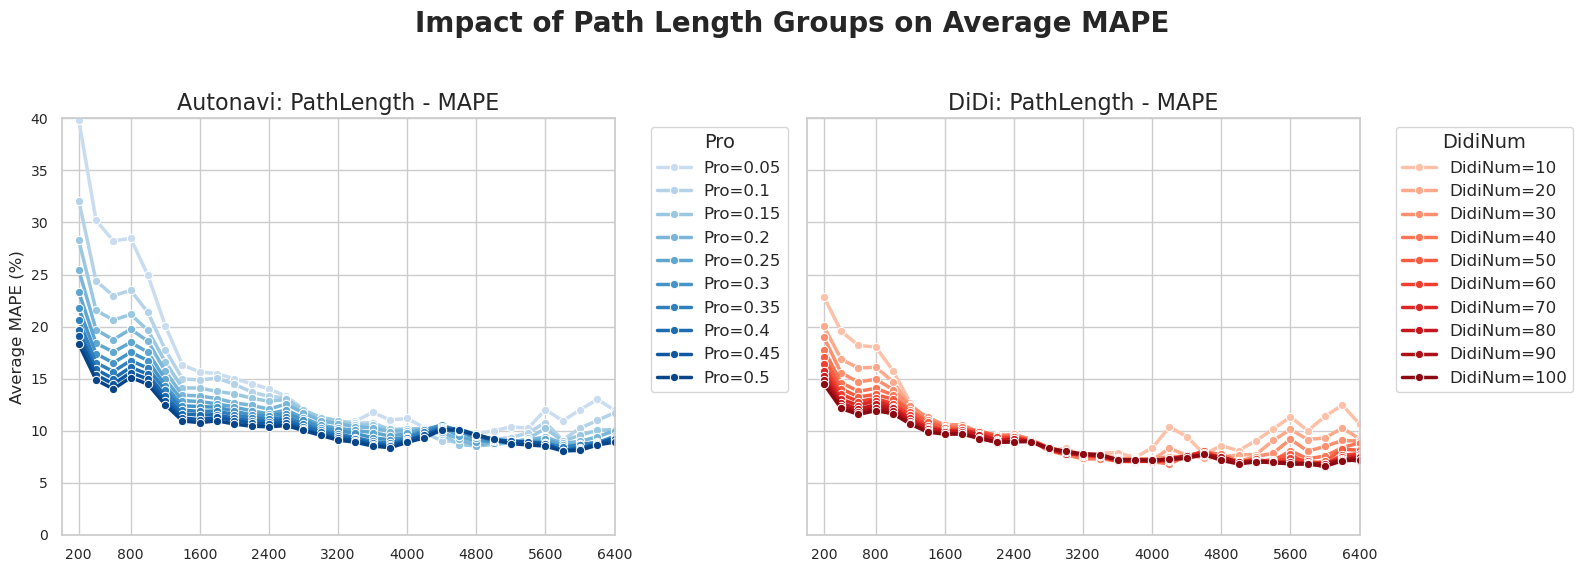

In [48]:
# 获取调色板，类似参考代码中的方式，这里使用深色系调色板
def get_deep_palette(palette_name, n_colors, skip=2):
    palette = sns.color_palette(palette_name, n_colors + skip)[skip:]
    return palette[:n_colors]

colors_autonavi = get_deep_palette("Blues", len(pro_list))
colors_didi = get_deep_palette("Reds", len(didiNum_list))

# 为 Pro 和 DidiNum 创建字典映射
pro_to_color = dict(zip(sorted(pro_list), colors_autonavi))
didi_to_color = dict(zip(sorted(didiNum_list), colors_didi))

fig, ((ax_mape_autonavi, ax_mape_didi)) = plt.subplots(
    1, 2, figsize=(16, 6), sharex=True, sharey=True
)

# MAPE子图 - Autonavi
if not aggregated_autonavi.empty and aggregated_autonavi['PathLengthGroup'].notna().any():
    # 按 Pro 分组
    groups = aggregated_autonavi.groupby('Pro')
    for pro_val in pro_list:
        if pro_val in groups.groups:
            group_data = groups.get_group(pro_val).dropna(subset=['PathLengthGroup'])
            # 按 PathLengthGroup 排序，确保线图正常
            group_data = group_data.sort_values('PathLengthGroup')
            sns.lineplot(
                data=group_data,
                x='PathLengthGroup',
                y='mean_MAPE',
                marker='o',
                label=f'Pro={pro_val}',
                color=pro_to_color[pro_val],
                ax=ax_mape_autonavi,
                linewidth=2.5
            )
        else:
            print(f'警告：Pro={pro_val} 在 Autonavi 数据中不存在对应组。')
    ax_mape_autonavi.set_title('Autonavi: PathLength - MAPE', fontsize=16)
    ax_mape_autonavi.set_xlabel('', fontsize=12)
    ax_mape_autonavi.set_ylabel('Average MAPE (%)', fontsize=12)
    ax_mape_autonavi.tick_params(axis='both', which='major', labelsize=10)
    ax_mape_autonavi.legend(title='Pro', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    ax_mape_autonavi.set_title('Autonavi Data is Empty', fontsize=16)
    ax_mape_autonavi.set_xlabel('', fontsize=12)
    ax_mape_autonavi.set_ylabel('Average MAPE (%)', fontsize=12)

# MAPE子图 - DiDi
if not aggregated_didi.empty and aggregated_didi['PathLengthGroup'].notna().any():
    # 按 DidiNum 分组
    groups = aggregated_didi.groupby('DidiNum')
    for n_val in didiNum_list:
        if n_val in groups.groups:
            group_data = groups.get_group(n_val).dropna(subset=['PathLengthGroup'])
            group_data = group_data.sort_values('PathLengthGroup')
            sns.lineplot(
                data=group_data,
                x='PathLengthGroup',
                y='mean_MAPE',
                marker='o',
                label=f'DidiNum={n_val}',
                color=didi_to_color[n_val],
                ax=ax_mape_didi,
                linewidth=2.5
            )
        else:
            print(f'警告：DidiNum={n_val} 在 DiDi 数据中不存在对应组。')
    ax_mape_didi.set_title('DiDi: PathLength - MAPE', fontsize=16)
    ax_mape_didi.set_xlabel('', fontsize=12)
    ax_mape_didi.set_ylabel('Average MAPE (%)', fontsize=12)
    ax_mape_didi.tick_params(axis='both', which='major', labelsize=10)
    ax_mape_didi.legend(title='DidiNum', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax_mape_didi.set_xlim(0,32)
    ax_mape_didi.set_ylim(0, 40)
    ax_mape_didi.set_xticks([1,4,8,12,16,20,24,28,32])
else:
    ax_mape_didi.set_title('DiDi Data is Empty', fontsize=16)
    ax_mape_didi.set_xlabel('', fontsize=12)
    ax_mape_didi.set_ylabel('Average MAPE (%)', fontsize=12)
    

plt.suptitle('Impact of Path Length Groups on Average MAPE', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

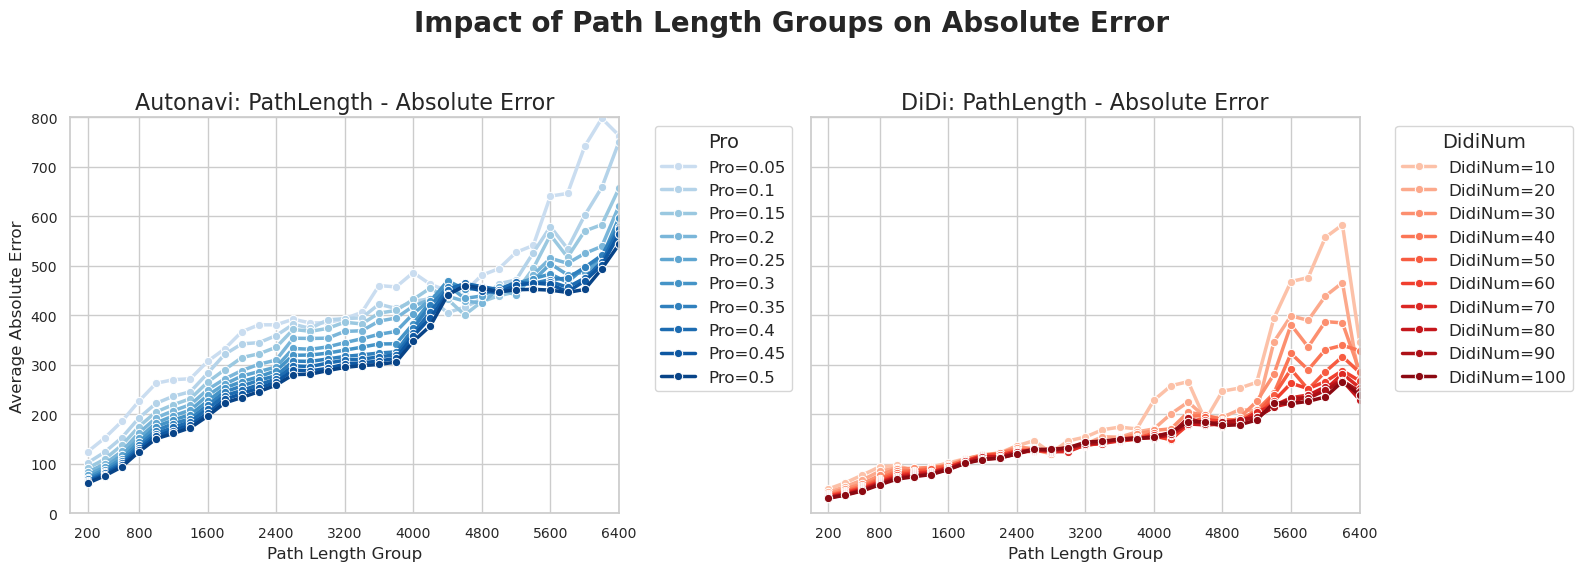

In [49]:
# 获取调色板，类似参考代码中的方式，这里使用深色系调色板
def get_deep_palette(palette_name, n_colors, skip=2):
    palette = sns.color_palette(palette_name, n_colors + skip)[skip:]
    return palette[:n_colors]

colors_autonavi = get_deep_palette("Blues", len(pro_list))
colors_didi = get_deep_palette("Reds", len(didiNum_list))

# 为 Pro 和 DidiNum 创建字典映射
pro_to_color = dict(zip(sorted(pro_list), colors_autonavi))
didi_to_color = dict(zip(sorted(didiNum_list), colors_didi))

fig, ((ax_abs_autonavi, ax_abs_didi)) = plt.subplots(
    1, 2, figsize=(16, 6), sharex=True, sharey=True
)

# 绝对误差子图 - Autonavi
if not aggregated_autonavi.empty and aggregated_autonavi['PathLengthGroup'].notna().any():
    groups = aggregated_autonavi.groupby('Pro')
    for pro_val in pro_list:
        if pro_val in groups.groups:
            group_data = groups.get_group(pro_val).dropna(subset=['PathLengthGroup'])
            group_data = group_data.sort_values('PathLengthGroup')
            sns.lineplot(
                data=group_data,
                x='PathLengthGroup',
                y='mean_AbsoluteError',
                marker='o',
                label=f'Pro={pro_val}',
                color=pro_to_color[pro_val],
                ax=ax_abs_autonavi,
                linewidth=2.5
            )
        else:
            print(f'警告：Pro={pro_val} 在 Autonavi 数据中不存在对应组。')
    ax_abs_autonavi.set_title('Autonavi: PathLength - Absolute Error', fontsize=16)
    ax_abs_autonavi.set_xlabel('Path Length Group', fontsize=12)
    ax_abs_autonavi.set_ylabel('Average Absolute Error', fontsize=12)
    ax_abs_autonavi.tick_params(axis='both', which='major', labelsize=10)
    ax_abs_autonavi.legend(title='Pro', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    ax_abs_autonavi.set_title('Autonavi Data is Empty', fontsize=16)
    ax_abs_autonavi.set_xlabel('Path Length Group', fontsize=12)
    ax_abs_autonavi.set_ylabel('Average Absolute Error', fontsize=12)

# 绝对误差子图 - DiDi
if not aggregated_didi.empty and aggregated_didi['PathLengthGroup'].notna().any():
    groups = aggregated_didi.groupby('DidiNum')
    for n_val in didiNum_list:
        if n_val in groups.groups:
            group_data = groups.get_group(n_val).dropna(subset=['PathLengthGroup'])
            group_data = group_data.sort_values('PathLengthGroup')
            sns.lineplot(
                data=group_data,
                x='PathLengthGroup',
                y='mean_AbsoluteError',
                marker='o',
                label=f'DidiNum={n_val}',
                color=didi_to_color[n_val],
                ax=ax_abs_didi,
                linewidth=2.5
            )
        else:
            print(f'警告：DidiNum={n_val} 在 DiDi 数据中不存在对应组。')
    ax_abs_didi.set_title('DiDi: PathLength - Absolute Error', fontsize=16)
    ax_abs_didi.set_xlabel('Path Length Group', fontsize=12)
    ax_abs_didi.set_ylabel('Average Absolute Error', fontsize=12)
    ax_abs_didi.tick_params(axis='both', which='major', labelsize=10)
    ax_abs_didi.legend(title='DidiNum', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax_abs_didi.set_xlim(0,32)
    ax_abs_didi.set_ylim(0, 800)
    ax_abs_didi.set_xticks([1,4,8,12,16,20,24,28,32])
else:
    ax_abs_didi.set_title('DiDi Data is Empty', fontsize=16)
    ax_abs_didi.set_xlabel('Path Length Group', fontsize=12)
    ax_abs_didi.set_ylabel('Average Absolute Error', fontsize=12)


for ax in [ax_mape_autonavi, ax_mape_didi]:
    plt.setp(ax.get_xticklabels(), visible=False)

plt.suptitle('Impact of Path Length Groups on Absolute Error', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Hour -- MAPE

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

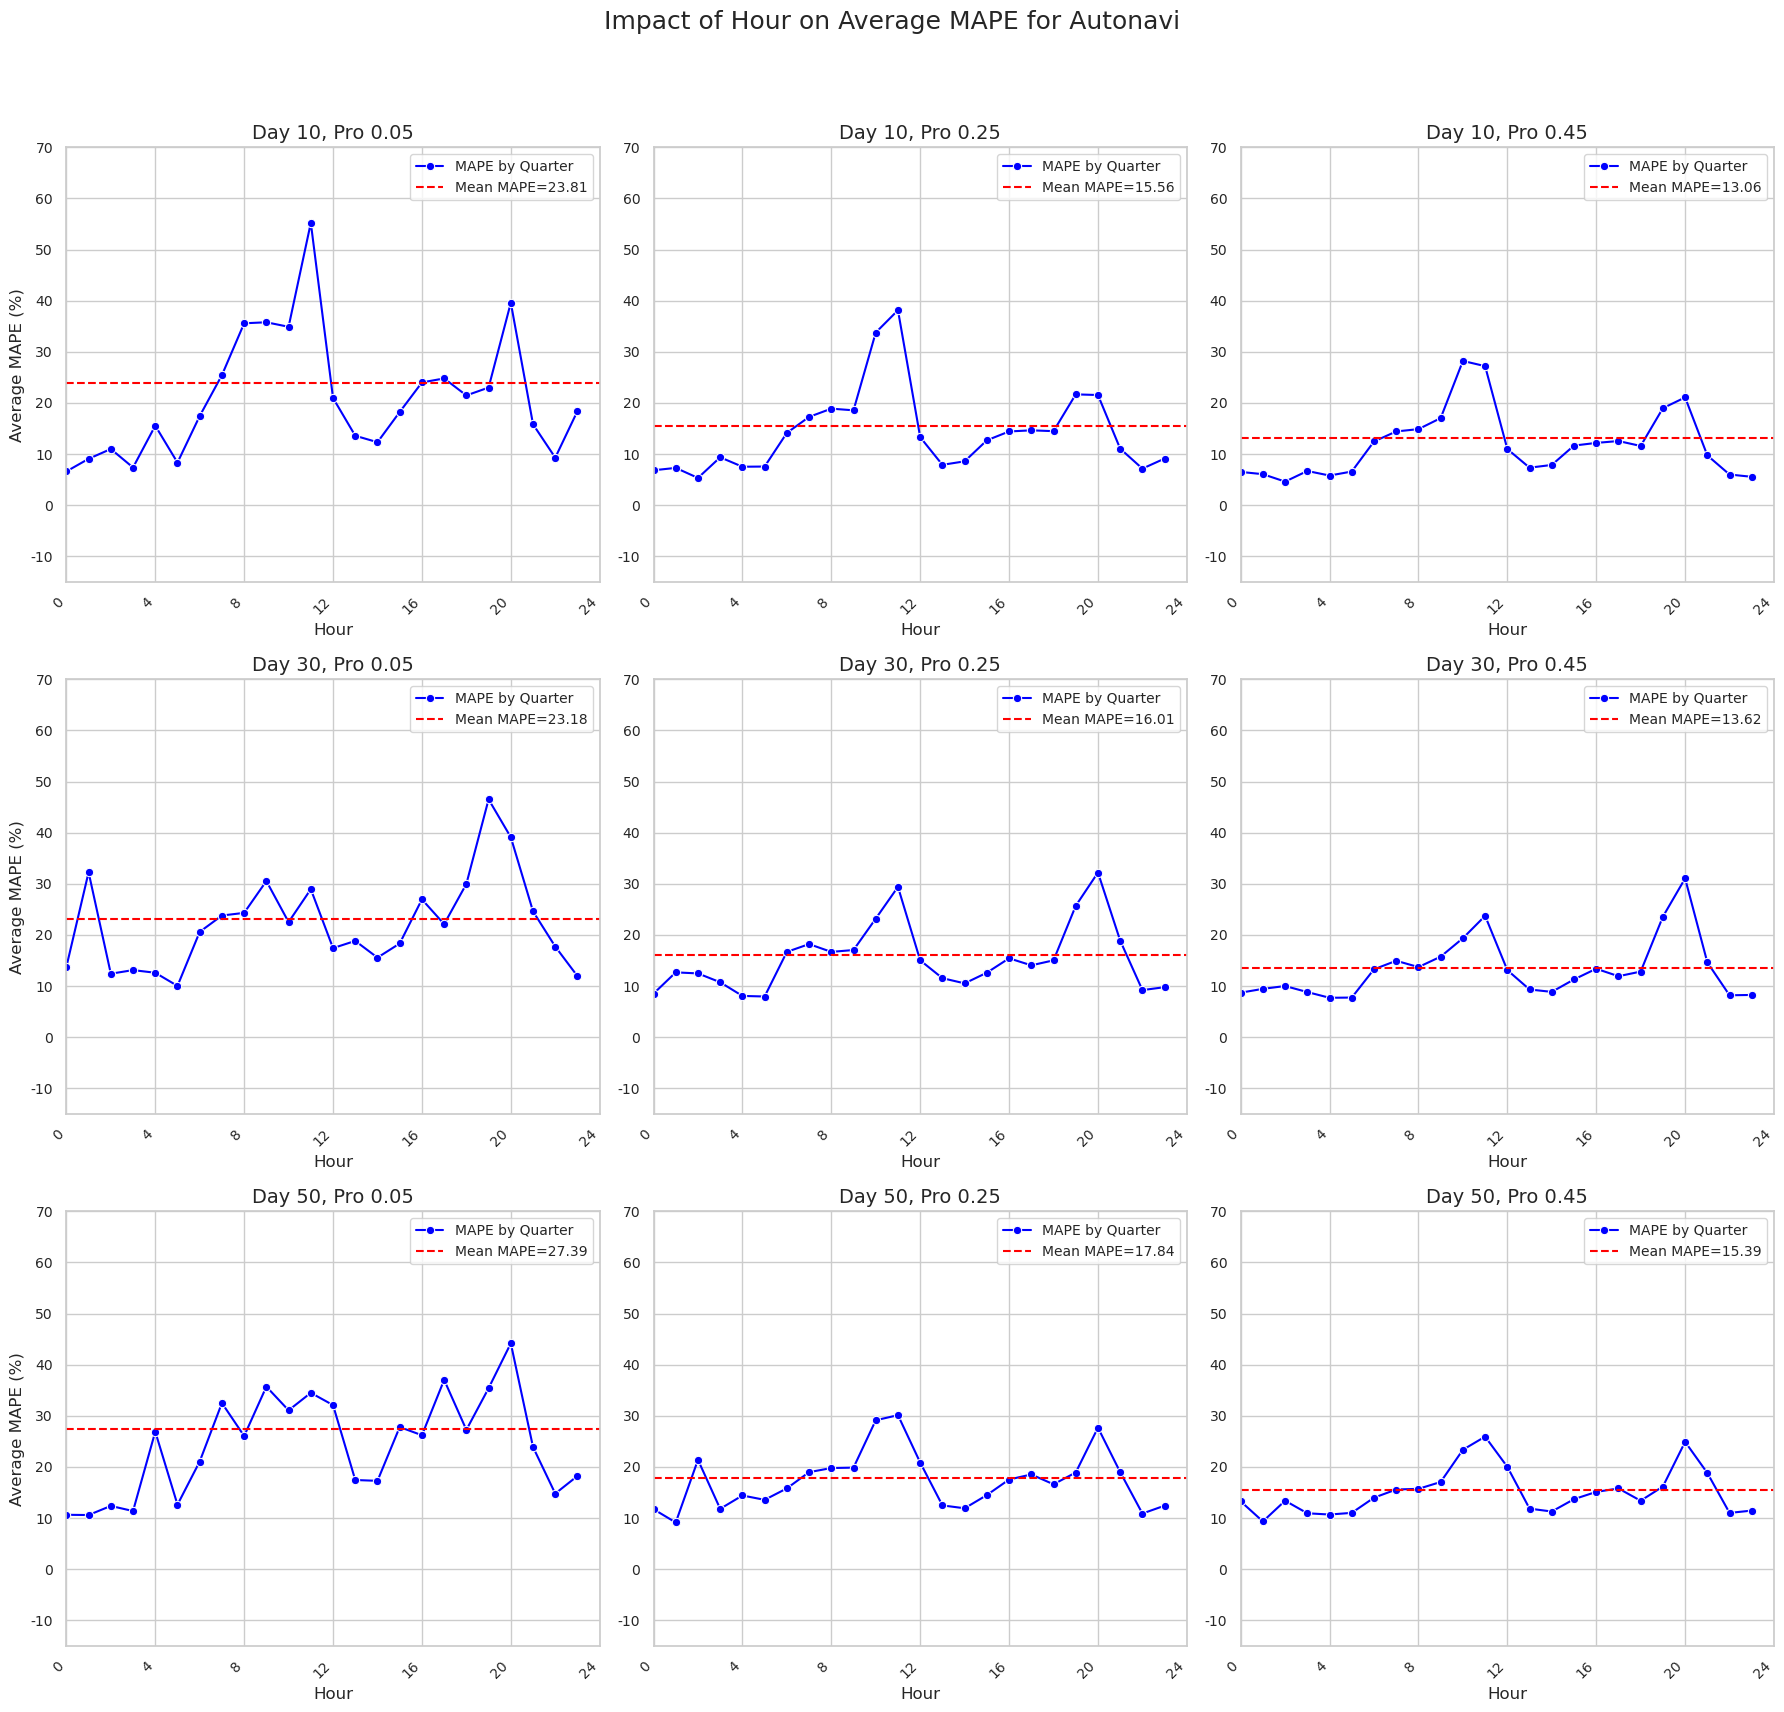

In [10]:

day_lst = [10, 30, 50]
pro_lst = [0.05, 0.25, 0.45]
autonavi_records = []

for file in autonavi_file_list:
    filename = os.path.basename(file)
    try:
        parts = filename.replace('.csv', '').split('_')
        pro_str = parts[3]  # 'Pro{pro}'
        date_str = parts[4] # 'date{m}'
        pro = float(pro_str.replace('Pro', ''))
        m = int(date_str.replace('date', ''))

        # 读取数据
        df = pd.read_csv(
            file,
            usecols=['Hour', 'Travel Time', 'Predicted Travel Time'],
            dtype={'Hour': int, 'Travel Time': int, 'Predicted Travel Time': float}
        )
        df['Predicted Travel Time'] = round(np.exp(df['Predicted Travel Time']) - 1)

        if df.empty:
            continue

        # 计算MAPE
        mape = calculate_mape(df['Travel Time'], df['Predicted Travel Time'])
        df['MAPE'] = mape
        df['APE'] = np.where(
        df['Travel Time'] != 0,
        np.abs((df['Travel Time'] - df['Predicted Travel Time']) / df['Travel Time']) * 100,
        np.nan
        )
        df['Pro'] = pro
        df['Day'] = m
        autonavi_records.append(df[['Day', 'Pro', 'Hour', 'APE', 'MAPE']])
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue

if len(autonavi_records) == 0:
    print("No Autonavi data available.")
    exit()

autonavi_file_quarter = pd.concat(autonavi_records, ignore_index=True)

# 筛选用户指定的day和pro
filtered_autonavi = autonavi_file_quarter[
    autonavi_file_quarter['Day'].isin(day_lst) &
    autonavi_file_quarter['Pro'].isin(pro_lst)
]

if filtered_autonavi.empty:
    print("No data available for the specified day and pro lists.")
    exit()

# 开始绘图
fig, axes = plt.subplots(len(day_lst), len(pro_lst), figsize=(18, 18))

# plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 较小字号
title_fontsize = 14
label_fontsize = 12
tick_fontsize = 10
legend_fontsize = 10

# 定义函数：设置x轴刻度为每隔16个Quarter显示一次对应的小时（0,4,8,12,16,20,24）
def set_custom_xticks(ax):
    # Quarter对应的小时
    # quarter_to_hour = {0:0, 24:4, 48:8, 72:12, 96:16, 120:20, 143:24}
    ticks = [0, 4,8,12,16,20,24]
    # labels = [quarter_to_hour[tick] for tick in ticks]
    labels = ticks
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=tick_fontsize)
    ax.set_xlim(0, 24)  # 设置x轴范围

for i, day_val in enumerate(day_lst):
    for j, pro_val in enumerate(pro_lst):
        ax = axes[i, j]

        # 筛选出对应day和pro的数据
        subset = filtered_autonavi[(filtered_autonavi['Day'] == day_val) & (filtered_autonavi['Pro'] == pro_val)]
        if subset.empty:
            ax.set_title(f"Day {day_val}, Pro {pro_val}\nNo Data", fontsize=title_fontsize)
            ax.set_xlabel('Hour', fontsize=label_fontsize)
            if j == 0:
                ax.set_ylabel('Average APE (%)', fontsize=label_fontsize)
            else:
                ax.set_ylabel('')
            continue

        # 按Quarter聚合
        quarter_agg = subset.groupby('Hour')['APE'].mean().reset_index()
        
        # 绘制Quarter vs MAPE
        sns.lineplot(data=quarter_agg, x='Hour', y='APE', marker='o', ax=ax, color='blue', label='MAPE by Quarter')

        # 计算当日平均MAPE（在这个day和pro组合下）
        daily_mean_mape = subset['MAPE'].mean()

        # 绘制水平线表示当日平均MAPE
        ax.axhline(y=daily_mean_mape, color='red', linestyle='--', label=f'Mean MAPE={daily_mean_mape:.2f}')

        ax.set_title(f"Day {day_val}, Pro {pro_val}", fontsize=title_fontsize)
        ax.set_xlabel('Hour', fontsize=label_fontsize)
        if j == 0:
            ax.set_ylabel('Average MAPE (%)', fontsize=label_fontsize)
        else:
            ax.set_ylabel('')
        ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
        ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize, loc='upper right')
        ax.set_ylim(-15, 70)

        # 设置x轴刻度
        set_custom_xticks(ax)

# 调整布局
plt.suptitle('Impact of Hour on Average MAPE for Autonavi', fontsize=title_fontsize+4)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

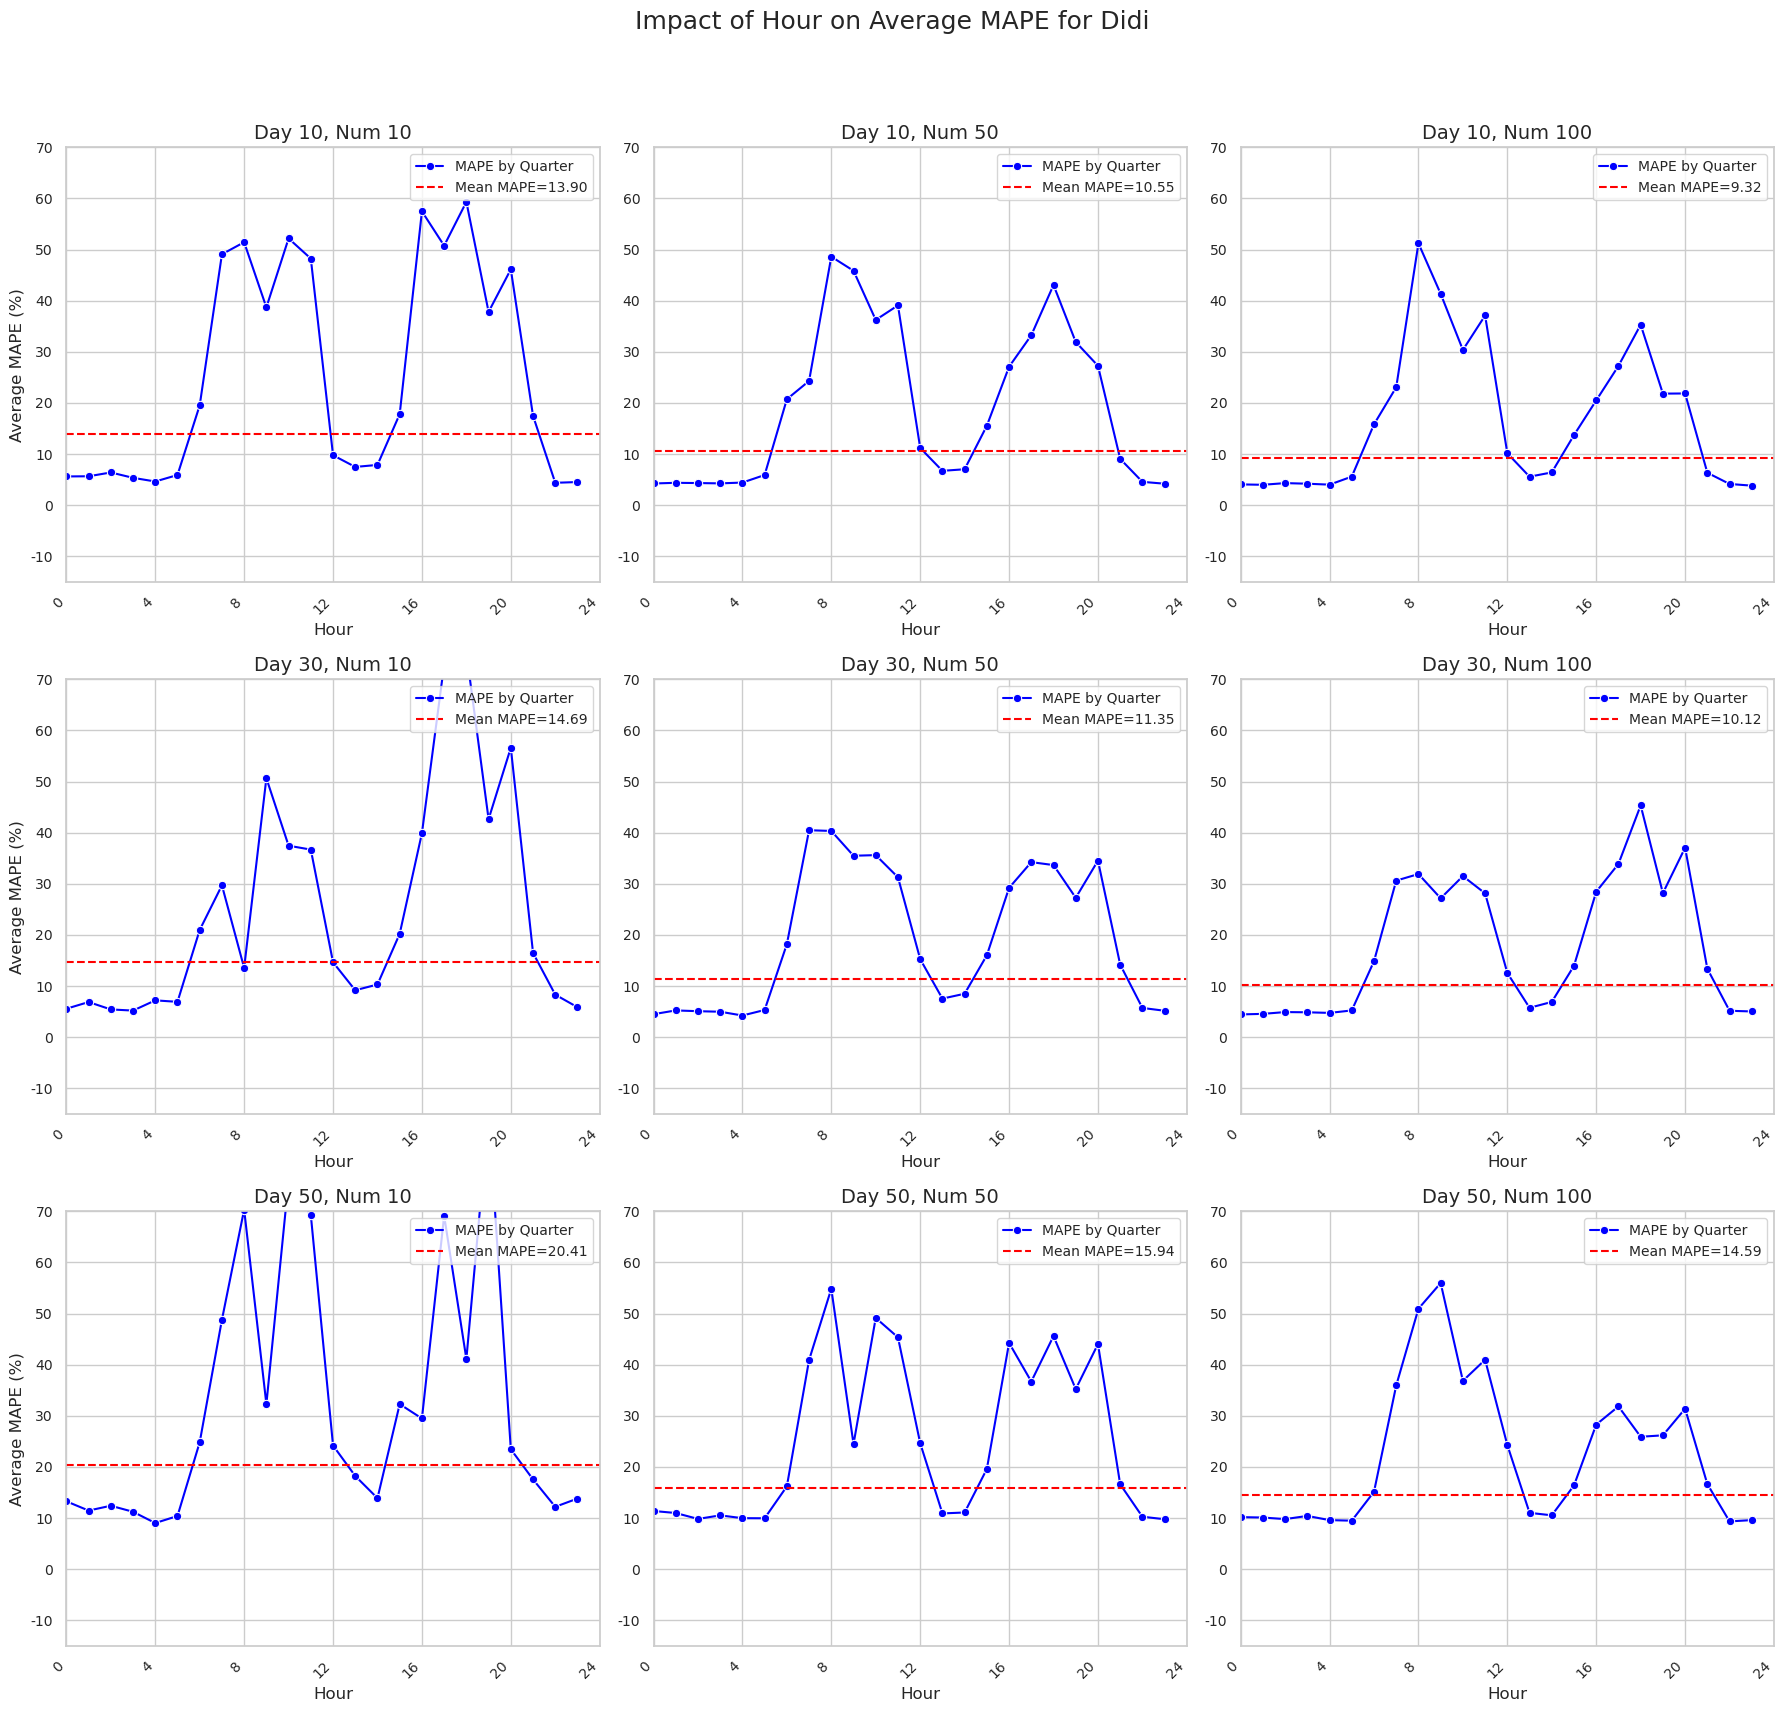

In [6]:
day_lst = [10, 30, 50]
num_lst = [10, 50, 100]
didi_records = []

for file in didi_file_list:
    filename = os.path.basename(file)
    try:
        parts = filename.replace('.csv', '').split('_')
        didi_str = parts[4]  # 'DiDi{didiNum}'
        date_str = parts[5]  # 'date{m}'

        didiNum = int(didi_str.replace('DiDi', ''))
        m = int(date_str.replace('date', ''))

        if didiNum not in didiNum_list or m not in date_list:
            continue

        # 读取数据
        df = pd.read_csv(
            file,
            usecols=['Hour', 'Travel Time', 'Predicted Travel Time'],
            dtype={'Hour': int, 'Travel Time': int, 'Predicted Travel Time': float}
        )
        df['Predicted Travel Time'] = round(np.exp(df['Predicted Travel Time']) - 1)

        if df.empty:
            continue

        # 计算MAPE
        mape = calculate_mape(df['Travel Time'], df['Predicted Travel Time'])
        df['MAPE'] = mape
        df['APE'] = np.where(
        df['Travel Time'] != 0,
        np.abs((df['Travel Time'] - df['Predicted Travel Time']) / df['Travel Time']) * 100,
        np.nan
        )
        df['Num'] = didiNum
        df['Day'] = m
        didi_records.append(df[['Day', 'Num', 'Hour', 'APE', 'MAPE']])
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue

if len(didi_records) == 0:
    print("No Autonavi data available.")
    exit()

didi_file_quarter = pd.concat(didi_records, ignore_index=True)

# 筛选用户指定的day和pro
filtered_didi = didi_file_quarter[
    didi_file_quarter['Day'].isin(day_lst) &
    didi_file_quarter['Num'].isin(num_lst)
]

if filtered_didi.empty:
    print("No data available for the specified day and pro lists.")
    exit()

# 开始绘图
fig, axes = plt.subplots(len(day_lst), len(num_lst), figsize=(18, 18))

# plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 较小字号
title_fontsize = 14
label_fontsize = 12
tick_fontsize = 10
legend_fontsize = 10

# 定义函数：设置x轴刻度为每隔16个Quarter显示一次对应的小时（0,4,8,12,16,20,24）
def set_custom_xticks(ax):
    # Quarter对应的小时
    # quarter_to_hour = {0:0, 24:4, 48:8, 72:12, 96:16, 120:20, 143:24}
    ticks = [0, 4,8,12,16,20,24]
    # labels = [quarter_to_hour[tick] for tick in ticks]
    labels = ticks
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=tick_fontsize)
    ax.set_xlim(0, 24)  # 设置x轴范围

for i, day_val in enumerate(day_lst):
    for j, num_val in enumerate(num_lst):
        ax = axes[i, j]

        # 筛选出对应day和pro的数据
        subset = filtered_didi[(filtered_didi['Day'] == day_val) & (filtered_didi['Num'] == num_val)]
        if subset.empty:
            ax.set_title(f"Day {day_val}, Num {num_val}\nNo Data", fontsize=title_fontsize)
            ax.set_xlabel('Hour', fontsize=label_fontsize)
            if j == 0:
                ax.set_ylabel('Average APE (%)', fontsize=label_fontsize)
            else:
                ax.set_ylabel('')
            continue

        # 按Quarter聚合
        quarter_agg = subset.groupby('Hour')['APE'].mean().reset_index()
        
        # 绘制Quarter vs MAPE
        sns.lineplot(data=quarter_agg, x='Hour', y='APE', marker='o', ax=ax, color='blue', label='MAPE by Quarter')

        # 计算当日平均MAPE（在这个day和num组合下）
        daily_mean_mape = subset['MAPE'].mean()

        # 绘制水平线表示当日平均MAPE
        ax.axhline(y=daily_mean_mape, color='red', linestyle='--', label=f'Mean MAPE={daily_mean_mape:.2f}')

        ax.set_title(f"Day {day_val}, Num {num_val}", fontsize=title_fontsize)
        ax.set_xlabel('Hour', fontsize=label_fontsize)
        if j == 0:
            ax.set_ylabel('Average MAPE (%)', fontsize=label_fontsize)
        else:
            ax.set_ylabel('')
        ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
        ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize, loc='upper right')

        ax.set_ylim(-15, 70)
        # 设置x轴刻度
        set_custom_xticks(ax)

# 调整布局
plt.suptitle('Impact of Hour on Average MAPE for Didi', fontsize=title_fontsize+4)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

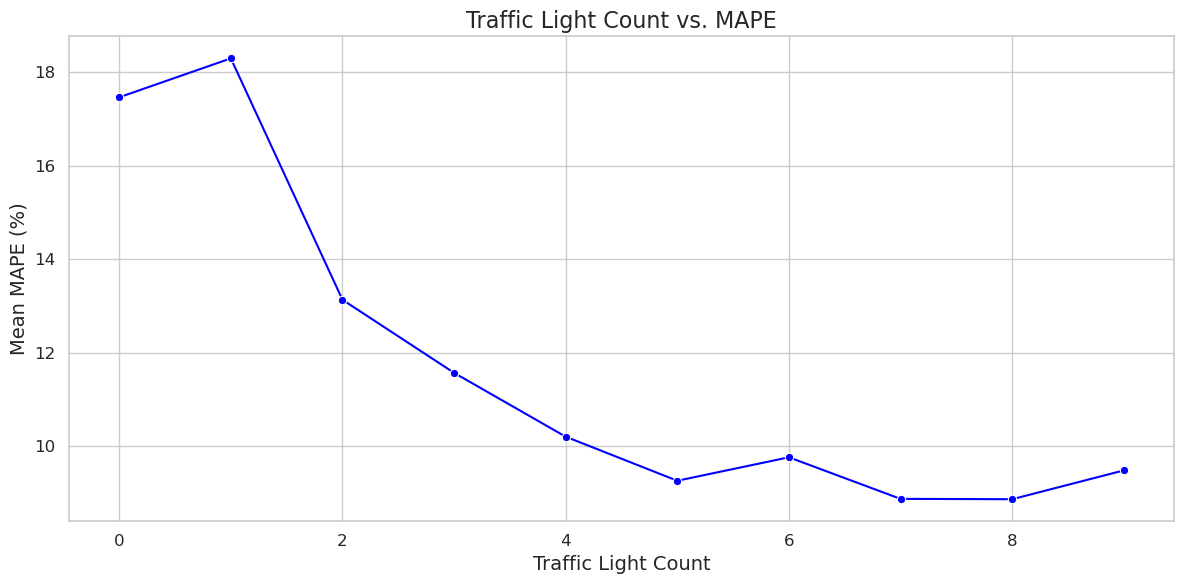

In [7]:
# 初始化列表存储数据
traffic_light_records = []

for file in autonavi_file_list:
    filename = os.path.basename(file)
    try:
        parts = filename.replace('.csv', '').split('_')
        pro_str = parts[3]  # 'Pro{pro}'
        date_str = parts[4] # 'date{m}'
        pro = float(pro_str.replace('Pro', ''))
        m = int(date_str.replace('date', ''))

        # 读取数据，包含 'Traffic Light Count' 字段
        df = pd.read_csv(
            file,
            usecols=['Traffic Light Count', 'Travel Time', 'Predicted Travel Time'],
            dtype={'Traffic Light Count': int, 'Travel Time': int, 'Predicted Travel Time': float}
        )
        df['Predicted Travel Time'] = round(np.exp(df['Predicted Travel Time']) - 1)

        if df.empty:
            continue

        # 计算 APE
        df['APE'] = np.where(
            df['Travel Time'] != 0,
            np.abs((df['Travel Time'] - df['Predicted Travel Time']) / df['Travel Time']) * 100,
            np.nan
        )

        # 添加到列表
        traffic_light_records.append(df[['Traffic Light Count', 'APE']])
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue

# 合并所有数据
if len(traffic_light_records) == 0:
    print("No data available.")
    exit()

all_data = pd.concat(traffic_light_records, ignore_index=True)

# 按 'Traffic Light Count' 分组，计算平均 MAPE
aggregated_data = all_data.groupby('Traffic Light Count')['APE'].mean().reset_index()
aggregated_data.rename(columns={'APE': 'MAPE'}, inplace=True)

# 绘制关系图
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=aggregated_data,
    x='Traffic Light Count',
    y='MAPE',
    marker='o',
    color='blue'
)
plt.title('Traffic Light Count vs. MAPE', fontsize=16)
plt.xlabel('Traffic Light Count', fontsize=14)
plt.ylabel('Mean MAPE (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()